In [1]:
import numpy as np
import pandas as pd
import os
import sleap

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# This folder should contain a set of folders with the output of training a model in SLEAP
model_folder = "../datasets/models"

In [5]:
[file for file in os.scandir(model_folder) if file.is_dir()]

[<DirEntry '240419_121605.multi_instance.n=20'>,
 <DirEntry '240419_132945.multi_instance.n=24'>,
 <DirEntry '240419_144126.centroid.n=25'>,
 <DirEntry '240419_145133.centered_instance.n=25'>,
 <DirEntry '240419_153451.multi_instance.n=28'>,
 <DirEntry '240419_165806.centroid.n=30'>,
 <DirEntry '240419_170859.centered_instance.n=30'>,
 <DirEntry '240419_174639.multi_instance.n=31'>,
 <DirEntry '240419_224243.multi_instance.n=39'>,
 <DirEntry '240420_020143.centroid.n=41'>,
 <DirEntry '240420_025422.centered_instance.n=41'>,
 <DirEntry '240420_143722.multi_instance.n=60'>,
 <DirEntry '240420_203756.multi_instance.n=70'>,
 <DirEntry '240421_015413.centroid.n=98'>,
 <DirEntry '240421_021747.centered_instance.n=98'>,
 <DirEntry '240421_141058.centroid.n=98'>,
 <DirEntry '240421_145514.centered_instance.n=98'>,
 <DirEntry '240421_175538.multi_instance.n=104'>]

In [38]:
met = sleap.load_metrics("../models/myee1/half_size.240416_202503.multi_instance", 'val')
mod = sleap.load_file("../models/myee1/half_size.240416_202503.multi_instance/labels_gt.val.slp")
pr = sleap.load_file("../models/myee1/half_size.240416_202503.multi_instance/labels_pr.val.slp")

In [27]:
[node.name for node in mod.skeleton.nodes]

['Head',
 'Neck',
 'UpperThorax',
 'LowerThorax',
 'Petiole',
 'Abdomen',
 'LForeLeg',
 'LForeFoot',
 'RForeLeg',
 'RForeFoot',
 'LMidLeg',
 'LMidFoot',
 'RMidLeg',
 'RMidFoot',
 'LHindLeg',
 'LHindFoot',
 'RHindLeg',
 'RHindFoot']

In [28]:
met['dist.dists'].shape

(336, 18)

In [80]:
met

{'vis.tp': rec.array(5649,
           dtype=int32),
 'vis.fp': rec.array(43,
           dtype=int32),
 'vis.tn': rec.array(9,
           dtype=int32),
 'vis.fn': rec.array(347,
           dtype=int32),
 'vis.precision': rec.array(0.99244554,
           dtype=float64),
 'vis.recall': rec.array(0.94212809,
           dtype=float64),
 'dist.frame_idxs': [9136,
  9136,
  9136,
  9136,
  9136,
  9136,
  9136,
  9136,
  9136,
  9136,
  9136,
  9136,
  9136,
  9136,
  9136,
  9136,
  9136,
  9136,
  9136,
  9136,
  9136,
  9136,
  5499,
  5499,
  5499,
  5499,
  5499,
  5499,
  5499,
  5499,
  5499,
  5499,
  5499,
  5499,
  5499,
  5499,
  5499,
  5499,
  5499,
  5499,
  5499,
  5499,
  5499,
  5378,
  5378,
  5378,
  5378,
  5378,
  5378,
  5378,
  5378,
  5378,
  5378,
  5378,
  5378,
  5378,
  5378,
  5378,
  5378,
  5378,
  22185,
  22185,
  22185,
  22185,
  22185,
  22185,
  22185,
  22185,
  22185,
  22185,
  20898,
  20898,
  20898,
  20898,
  20898,
  20898,
  20898,
  20898,
  2089

In [46]:
diffs = pd.DataFrame(met['dist.dists'], columns=[node.name for node in mod.skeleton.nodes])

In [79]:
pd.DataFrame((diffs.count() / len(met['dist.dists'])).sort_values(ascending=False), columns=['labelled_identified'])

,labelled_identified
UpperThorax,0.970238
Petiole,0.967262
Neck,0.967262
Head,0.964286
RMidLeg,0.958333
LowerThorax,0.955357
Abdomen,0.955357
LHindLeg,0.955357
RHindLeg,0.949405
LForeLeg,0.946429


<AxesSubplot:xlabel='LForeFoot', ylabel='Count'>

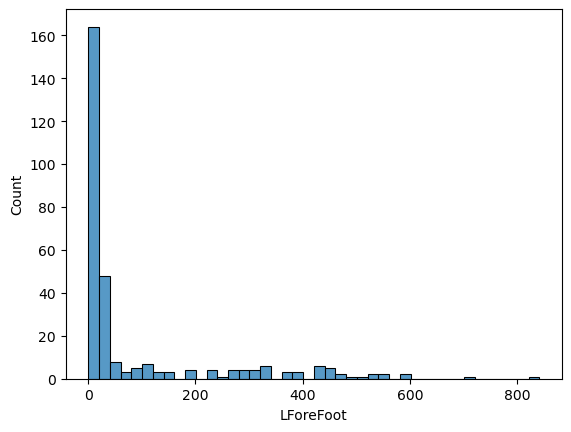

In [58]:
sns.histplot(diffs['LForeFoot'])

## Summary stats

In [7]:
summary_stats = ['vis.tp',
                 'vis.fp',
                 'vis.tn',
                 'vis.fn',
                 'vis.precision',
                 'vis.recall',
                 'dist.avg',
                 'dist.p50',
                 'dist.p75',
                 'dist.p90',
                 'dist.p95',
                 'dist.p99',
                 'oks_voc.mAP',
                 'oks_voc.mAR',
                 'pck_voc.mAP',
                 'pck_voc.mAR']

all_stats = []

for entry in os.scandir(model_folder):
    if entry.is_dir():
        for file in os.scandir(entry):
            if file.is_file() and file.name.endswith(".npz"):
                with np.load(file.path, None, True) as np_file:
                    #display(np_file['metrics'][()].keys())
                    stats = {'model': entry.name, 'filename': file.name}
                    stats.update({key: np_file['metrics'][()][key][()] for key in np_file['metrics'][()] if key in summary_stats})
                    all_stats.append(stats)

pd.DataFrame(all_stats)

,model,filename,vis.tp,vis.fp,vis.tn,vis.fn,vis.precision,vis.recall,dist.avg,dist.p50,dist.p75,dist.p90,dist.p95,dist.p99,oks_voc.mAP,oks_voc.mAR,pck_voc.mAP,pck_voc.mAR
0,240419_121605.multi_instance.n=20,metrics.train.npz,533,0,4,39,1.000000,0.931818,1.757246,1.553340,2.232140,2.866529,3.787756,6.075743,0.799674,0.802857,0.654442,0.657143
1,240419_121605.multi_instance.n=20,metrics.val.npz,51,0,0,3,1.000000,0.944444,5.378742,2.566056,5.277228,12.325226,18.816523,32.802148,0.325743,0.320000,0.223762,0.220000
2,240419_132945.multi_instance.n=24,metrics.train.npz,980,0,6,4,1.000000,0.995935,1.630947,1.473903,2.133305,2.781930,3.260232,4.634551,0.989371,0.990909,0.795518,0.807273
3,240419_132945.multi_instance.n=24,metrics.val.npz,107,1,1,53,0.990741,0.668750,30.185861,2.780397,6.141916,52.090018,278.300897,297.587433,0.206436,0.205882,0.090594,0.094118
4,240419_144126.centroid.n=25,metrics.train.npz,981,9,0,0,0.990909,1.000000,10.048137,0.000028,0.000042,0.000057,0.000063,292.882156,0.889310,0.912281,0.889310,0.912281
5,240419_144126.centroid.n=25,metrics.val.npz,211,5,0,0,0.976852,1.000000,66.843065,0.000030,0.000059,290.002328,447.950351,559.421597,0.493069,0.500000,0.493069,0.500000
6,240419_145133.centered_instance.n=25,metrics.train.npz,944,0,10,0,1.000000,1.000000,1.316658,1.279918,1.770252,2.154456,2.348655,2.691191,1.000000,1.000000,0.863413,0.875472
7,240419_145133.centered_instance.n=25,metrics.val.npz,331,6,2,57,0.982196,0.853093,21.777771,4.299033,12.916422,70.814381,142.248989,200.585649,0.152864,0.259091,0.045603,0.109091
8,240419_153451.multi_instance.n=28,metrics.train.npz,1461,0,15,18,1.000000,0.987830,2.137102,1.744015,2.527453,3.507851,4.449735,8.778058,0.910156,0.920000,0.679777,0.696471
9,240419_153451.multi_instance.n=28,metrics.val.npz,72,0,0,36,1.000000,0.666667,11.617351,2.652616,4.899268,16.675699,21.978545,224.230978,0.316832,0.312500,0.165347,0.162500
